# Siddhant Thakur-19A1HP054

## Question1: Logistic Regression

In [1]:
import pandas as pd
import numpy as np

#importing the libraries

In [3]:
SA_df = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data" )

#loading the dataset

In [4]:
SA_df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
SA_df = SA_df.drop(["row.names"],axis = 1)

In [6]:
SA_df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [43]:
#we're predicting the 'chd' which is our target variable (dependant variable)

In [44]:
SA_df.info()

#getting information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [46]:
SA_df.chd.value_counts()

#value count is how much of 0 and how much 1

0    302
1    160
Name: chd, dtype: int64

In [9]:
X_features = list( SA_df.columns )
X_features.remove( 'chd' )
X_features

#we created a var named x_features and listing all the columns and removing the target var

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age']

## Encoding categorical values

In [47]:
encoded_SA_df = pd.get_dummies( SA_df[X_features],drop_first = True )

#we create dummy var. (pd.get_dummies)

In [11]:
list(encoded_SA_df.columns)

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'famhist_Present']

In [12]:
import statsmodels.api as sm
Y = SA_df.chd
X = sm.add_constant( encoded_SA_df )

## Splitting into Train and Validation Sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

#we split to see the result of model in training data set
#in train we teach the model
#in test data target var is not given and independant var are present (we're predicting the model correct or not)

## Building Logistic Regression Model

In [14]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

#logit is logistic regression

Optimization terminated successfully.
         Current function value: 0.515459
         Iterations 6


### Printing model summary

In [15]:
logit_model.summary2()

#Pseudo R-squared:	0.198 near to 1 then that much better is model
#P>\Z\ should be <0.05 else reject all the rest

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.199     
Dependent Variable: chd              AIC:              352.9863  
Date:               2020-09-21 13:36 BIC:              390.7628  
No. Observations:   323              Log-Likelihood:   -166.49   
Df Model:           9                LL-Null:          -207.83   
Df Residuals:       313              LLR p-value:      4.7595e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.5732   1.5863 -4.1437 0.0000 -9.6823 -3.4640
sbp                0.0097   0.0068  1.4272 0.1535 -0.0036  0.0230
tobacco            0.0619   0.0319  1.9390 0.0525 -0.0007  0.1245
ldl                0.2067   0.0717  2.8837 0.0039  0.0662  0.3472
adiposity          0.0262   0.0347  0.7554 0.4500 -0.0418  0.0942
typea              0.0387   0.0149  2.5972 0.0094  0.0095  0.0679
obesity           -0.0646   0.0510 -1.2661 0.2055 -0.1645  0.0354
alcohol            0.0011   0.0063  0.1777 0.8590 -0.0113  0.0135
age                0.0415   0.0143  2.9071 0.0036  0.0135  0.0696
famhist_Present    0.7519   0.2731  2.7533 0.0059  0.2167  1.2872
=================================================================

"""

## Model Diagnostics


In [16]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [17]:
significant_vars = get_significant_vars( logit_model )
significant_vars

#getting significant var (showing only values less than 0.05)

['const', 'ldl', 'typea', 'age', 'famhist_Present']

In [18]:
final_logit = sm.Logit( y_train,sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.528087
         Iterations 6


In [19]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.179     
Dependent Variable: chd              AIC:              351.1443  
Date:               2020-09-21 13:37 BIC:              370.0326  
No. Observations:   323              Log-Likelihood:   -170.57   
Df Model:           4                LL-Null:          -207.83   
Df Residuals:       318              LLR p-value:      2.5286e-15
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.6526   1.1139 -5.9723 0.0000 -8.8358 -4.4694
ldl                0.2028   0.0648  3.1320 0.0017  0.0759  0.3298
typea              0.0372   0.0145  2.5625 0.0104  0.0088  0.0657
age                0.0592   0.0111  5.3278 0.0000  0.0374  0.0809
famhist_Present    0.7004   0.2666  2.6275 0.0086  0.1779  1.2228
=================================================================

"""

## Predicting on Test Data


In [20]:
y_pred_df = pd.DataFrame( { "actual": y_test,"predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) } )

In [21]:
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
29,1,0.657565
357,0,0.465959
447,0,0.067349
5,0,0.582238
209,0,0.598367
76,0,0.406939
75,0,0.180435
296,0,0.094291
428,0,0.247063
227,1,0.223939


In [22]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
29,1,0.657565,1
357,0,0.465959,0
447,0,0.067349,0
5,0,0.582238,1
209,0,0.598367,1
76,0,0.406939,0
75,0,0.180435,0
296,0,0.094291,0
428,0,0.247063,0
227,1,0.223939,0


## Creating a Confusion Matrix

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [24]:
def draw_cm( actual, predicted ):
## Cret
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Bad credit", "Good Credit"] ,
    yticklabels = ["Bad credit", "Good Credit"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

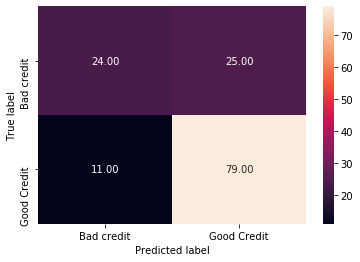

In [25]:
draw_cm( y_pred_df.actual,y_pred_df.predicted )

In [26]:
# True positive=79, True Negative=24
# False positive=25, False negative=11

## Measuring Accuracies

In [27]:
print( metrics.classification_report( y_pred_df.actual,y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        90
           1       0.69      0.49      0.57        49

    accuracy                           0.74       139
   macro avg       0.72      0.68      0.69       139
weighted avg       0.73      0.74      0.73       139



In [ ]:
#recall is sensitivity

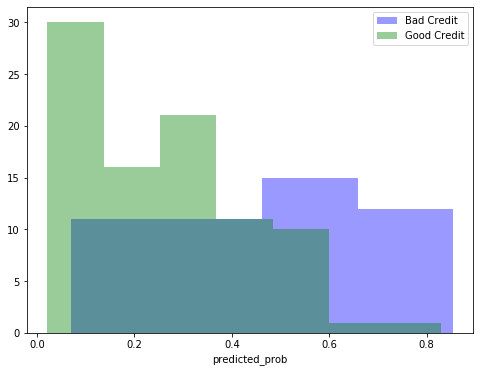

In [28]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"],
kde=False, color = 'b',
label = 'Bad Credit' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"],
kde=False, color = 'g',
label = 'Good Credit' )
plt.legend()
plt.show()

## ROC & AUC

In [ ]:
#used in model accuracy
# if ROC> 0.5 then that's better

In [29]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

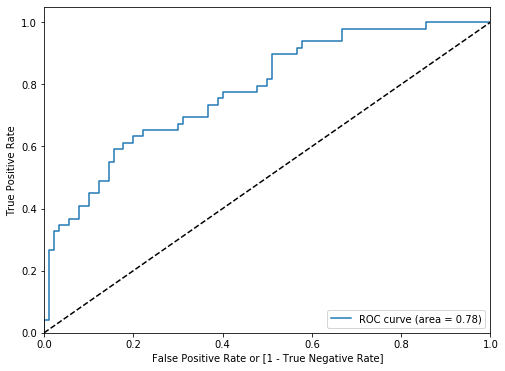

In [30]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,y_pred_df.predicted_prob)

In [ ]:
#Here ROC= 0.78 = good
#true +ve rate aka sensitivity
#true -ve aka specificty

In [48]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

#To see the score

0.78

## Finding Optimal Cutoff

### Youden's index

In [32]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,'fpr': fpr,'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
43,0.591837,0.155556,0.434413,0.436281
46,0.612245,0.177778,0.421181,0.434467
49,0.632653,0.200000,0.414076,0.432653
52,0.653061,0.222222,0.405464,0.430839
44,0.591837,0.166667,0.430871,0.425170


In [33]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.43 else 0)

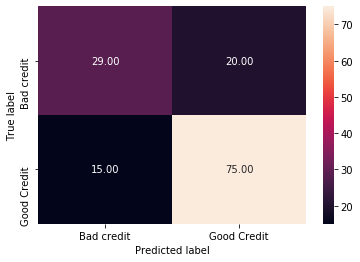

In [34]:
draw_cm( y_pred_df.actual,y_pred_df.predicted_new)

In [35]:
print(metrics.classification_report( y_pred_df.actual,y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        90
           1       0.66      0.59      0.62        49

    accuracy                           0.75       139
   macro avg       0.72      0.71      0.72       139
weighted avg       0.74      0.75      0.74       139



## Cost Based Approach

In [36]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

In [37]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [38]:
idx = 0
## iterate cut-off probability values between 0.1 and 0.5
for each_prob in range( 10, 50):
    cost = get_total_cost( y_pred_df.actual,y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob/100) else 0), 1, 5 )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [39]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
3,0.13,66.0
2,0.12,68.0
7,0.17,69.0
8,0.18,69.0
1,0.11,70.0


In [40]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.13 else 0)

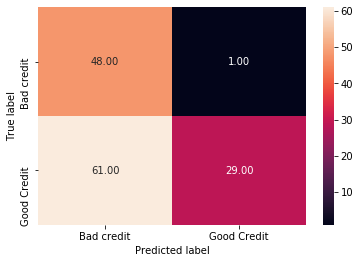

In [41]:
draw_cm( y_pred_df.actual,y_pred_df.predicted_using_cost )

In [42]:
print(metrics.classification_report( y_pred_df.actual,y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        90
           1       0.66      0.59      0.62        49

    accuracy                           0.75       139
   macro avg       0.72      0.71      0.72       139
weighted avg       0.74      0.75      0.74       139

